## 先创建一个数据样本集合
$Y = 2X+E+3,(E为标准正态分布误差)$

In [26]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import torch
e = np.random.randn(100)
#print(data)
x = np.random.uniform(1,10,size=(100,1)) #从均匀分布中100个取值

### 数据清洗连接操作

In [27]:
X = DataFrame(data=x) 
print(X)
E = DataFrame(data=e)
print(E)
Y = 2*X+E+3
#Y = Y.rename(columns={0:'1'})
Y.columns  = ['1']
print(Y)
Dt = pd.concat([X,Y.reindex(X.index)],axis=1)#将样本数据
print(Dt)
Dt.to_csv('LinR.csv',index = False,header = False) #去掉头索引和列索引写入LinR.csv文件

           0
0   7.959296
1   2.914118
2   6.531930
3   6.033350
4   3.329694
..       ...
95  6.689540
96  9.719845
97  1.911316
98  6.540799
99  2.833886

[100 rows x 1 columns]
           0
0  -0.988615
1  -0.298217
2   1.846047
3   1.982957
4   0.644001
..       ...
95 -1.317616
96  0.844359
97  0.475709
98 -0.182511
99 -0.075437

[100 rows x 1 columns]
            1
0   17.929977
1    8.530018
2   17.909907
3   17.049656
4   10.303389
..        ...
95  15.061463
96  23.284048
97   7.298340
98  15.899087
99   8.592336

[100 rows x 1 columns]
           0          1
0   7.959296  17.929977
1   2.914118   8.530018
2   6.531930  17.909907
3   6.033350  17.049656
4   3.329694  10.303389
..       ...        ...
95  6.689540  15.061463
96  9.719845  23.284048
97  1.911316   7.298340
98  6.540799  15.899087
99  2.833886   8.592336

[100 rows x 2 columns]


In [28]:
import matplotlib.pyplot as plt
sample = np.genfromtxt('LinR.csv',delimiter=',')
print(sample)
x = sample[:,0]  #提取出自变量
y = sample[:,1]  #提取出函数值

[[ 7.95929583 17.92997689]
 [ 2.91411788  8.5300183 ]
 [ 6.53192986 17.90990674]
 [ 6.0333498  17.04965623]
 [ 3.32969394 10.30338909]
 [ 9.78091003 24.11104012]
 [ 5.50414492 15.01162983]
 [ 2.3905083   7.98267035]
 [ 9.10073718 20.63593365]
 [ 8.6771435  20.00840521]
 [ 8.59297259 20.47870044]
 [ 3.71421162 13.64842939]
 [ 9.53717825 20.65189706]
 [ 1.65102104  5.72905434]
 [ 2.25873778  6.97617708]
 [ 4.22231735 11.55259733]
 [ 1.53631731  4.94287203]
 [ 5.34000791 13.16707094]
 [ 6.17545718 15.06864934]
 [ 4.90415263 12.41321868]
 [ 7.75327441 18.6794576 ]
 [ 5.69725718 12.84726204]
 [ 3.56909863 10.5966961 ]
 [ 9.94681425 21.33072322]
 [ 3.59799413  9.56658453]
 [ 3.87835658 11.11208729]
 [ 5.03228019 13.68579256]
 [ 9.48569476 22.77879716]
 [ 4.66228634 12.75729249]
 [ 2.4908625   7.26331882]
 [ 4.81153515 12.35458447]
 [ 9.58406536 22.38109883]
 [ 4.28121897 10.74117052]
 [ 2.45652558  8.71965016]
 [ 1.9736664   6.4809288 ]
 [ 9.51051954 22.72786535]
 [ 6.75959417 17.81727331]
 

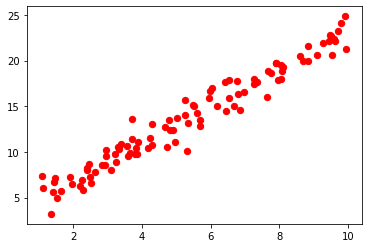

In [29]:
# 做出y = x*2+e+3的散点图
plt.scatter(x, y, marker = 'o',color = 'red', s = 40 )
plt.show()

In [30]:
#损失函数
def loss_function(data,b,w):
    Total_Error = 0
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        Total_Error += ((w*x+b)-y)**2
    return Total_Error/float(len(data))

# 梯度下降步骤
def gradient_step(b_current,w_current,data,learning_rate):
    #初始化梯度
    b_grad = 0
    w_grad = 0
    N = float(len(data))
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        b_grad +=  (2/N)*(w_current*x+b_current-y)
        w_grad +=  x*(2/N)*(w_current*x+b_current-y)
    new_b  = b_current - learning_rate*b_grad
    #print(new_b)
    #w_current -= learning_rate*w_grad
    new_w = b_current - learning_rate*w_grad
    #print(new_w)
    return [new_b,new_w]

In [30]:
#梯度下降迭代
def gradient_descent_iter(initial_b,initial_w,iteration_num,data,learning_rate):
    b_current = initial_b
    w_current = initial_w
    for i in range(iteration_num):
        b_current,w_current = gradient_step(b_current,w_current,np.array(data),learning_rate)
    return [b_current,w_current]

In [30]:
#运行函数
def run_fun():
    initial_b = 0
    initial_w = 0
    iteration_num = 20000
    learning_rate = 0.0001
    data = np.genfromtxt('LinR.csv',delimiter=',')
    print('Starting gradient decent at b = {0},w={1},loss_value = {2}'.format(initial_b,initial_w,loss_function(data,initial_b,initial_w)))
    print('Running...')
    [b,w] = gradient_descent_iter(initial_b,initial_w,iteration_num,data,learning_rate)
    print('After {0} iterations b = {1},w = {2},loss_value = {3}'.format(iteration_num,b,w,loss_function(data,b,w)))
    
#if __name__ == '__main__'():
run_fun()

    

Starting gradient decent at b = 0,w=0,loss_value = 217.6852494453724
Running...
After 20000 iterations b = 2.1616063195346547,w = 2.1614204809921613,loss_value = 1.4195063550286242


>可以看到迭代出的b值与w值与预先设定的2和3很接近损失函数值也很小了

In [33]:
import matplotlib.pyplot as plt
sample = np.genfromtxt('LinR.csv',delimiter=',')
print(sample)
x_1 = sample[:,0]
y_1 = sample[:,1]

[[ 7.95929583 17.92997689]
 [ 2.91411788  8.5300183 ]
 [ 6.53192986 17.90990674]
 [ 6.0333498  17.04965623]
 [ 3.32969394 10.30338909]
 [ 9.78091003 24.11104012]
 [ 5.50414492 15.01162983]
 [ 2.3905083   7.98267035]
 [ 9.10073718 20.63593365]
 [ 8.6771435  20.00840521]
 [ 8.59297259 20.47870044]
 [ 3.71421162 13.64842939]
 [ 9.53717825 20.65189706]
 [ 1.65102104  5.72905434]
 [ 2.25873778  6.97617708]
 [ 4.22231735 11.55259733]
 [ 1.53631731  4.94287203]
 [ 5.34000791 13.16707094]
 [ 6.17545718 15.06864934]
 [ 4.90415263 12.41321868]
 [ 7.75327441 18.6794576 ]
 [ 5.69725718 12.84726204]
 [ 3.56909863 10.5966961 ]
 [ 9.94681425 21.33072322]
 [ 3.59799413  9.56658453]
 [ 3.87835658 11.11208729]
 [ 5.03228019 13.68579256]
 [ 9.48569476 22.77879716]
 [ 4.66228634 12.75729249]
 [ 2.4908625   7.26331882]
 [ 4.81153515 12.35458447]
 [ 9.58406536 22.38109883]
 [ 4.28121897 10.74117052]
 [ 2.45652558  8.71965016]
 [ 1.9736664   6.4809288 ]
 [ 9.51051954 22.72786535]
 [ 6.75959417 17.81727331]
 

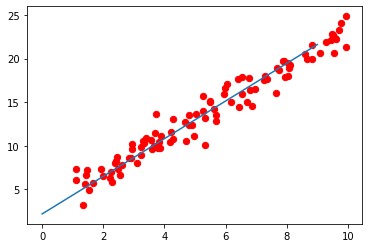

In [34]:
#将拟合曲线与样本做比较
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x_1, y_1, marker = 'o',color = 'red', s = 40,label = 'sampelSC' )
#plt.show()
x_2 = np.arange(0,10)
w = 2.1614204809921613
b = u2.1616063195346547
y_2 = w*x+b
plt.plot(x_2,y_2,label='Fitting Curve')
plt.show()

>可以看到曲线拟合的效果还是很不错的